<a href="https://colab.research.google.com/github/FennyAmalo/personal-projects/blob/main/House_Price_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taken from** https://www.youtube.com/watch?v=Wqmtf9SA_kk
Dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
# This is a regression modelling on predicting House Price in California

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
data = pd.read_csv("housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# drop the null value and saves the result in the data object
data.dropna(inplace=True)

In [ ]:
data.info() #now the amount of non-null values are all the same

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1) # dropping this column from the training data, to be placed into the testing data (y)
y = data['median_house_value']

In [ ]:
X # the "median house value" column is no longer there

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# combine x and y training data to see if there is correlation
train_data = X_train.join(y_train) 
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20584,-121.95,38.65,19.0,1265.0,228.0,755.0,218.0,3.3472,INLAND,69800.0
9820,-121.91,36.62,52.0,1431.0,300.0,657.0,293.0,3.2865,<1H OCEAN,240100.0
20568,-121.78,38.66,18.0,4224.0,632.0,1907.0,641.0,4.8226,INLAND,139900.0
12944,-121.26,38.64,40.0,1098.0,175.0,415.0,160.0,4.8375,INLAND,217400.0
10517,-117.71,33.51,11.0,2198.0,252.0,883.0,281.0,13.1477,<1H OCEAN,487000.0
...,...,...,...,...,...,...,...,...,...,...
8640,-118.40,33.87,26.0,6712.0,1441.0,2803.0,1394.0,5.2276,<1H OCEAN,434500.0
13417,-117.47,34.06,33.0,1379.0,273.0,884.0,229.0,2.7574,INLAND,125000.0
18628,-121.87,37.10,20.0,1918.0,304.0,798.0,302.0,7.5755,<1H OCEAN,402300.0
11754,-121.17,38.76,14.0,2028.0,255.0,781.0,251.0,6.5322,INLAND,394000.0


Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25d4208910>,
      dtype=object)

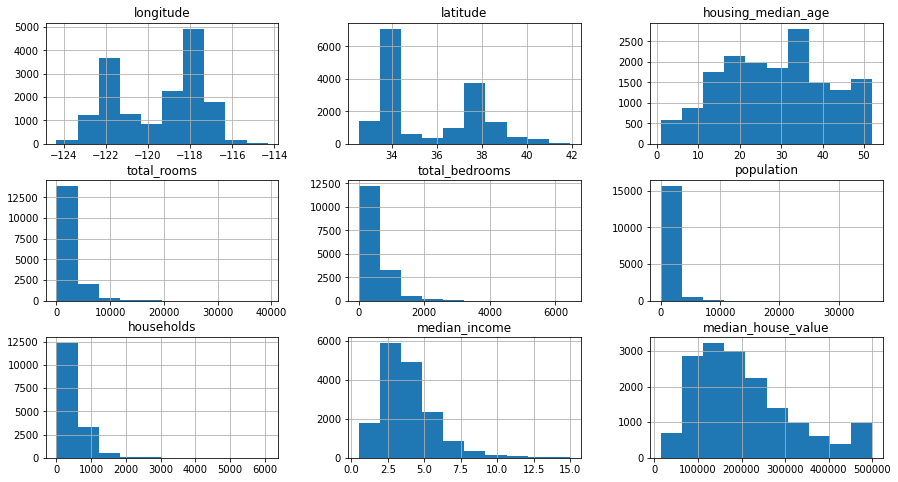

In [ ]:
train_data.hist(figsize=(15,8)) # interesting to see the correlation of the target variables

In [ ]:
train_data.corr() # every feature has a correlation of 1.000000 with itself

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924816,-0.110986,0.042393,0.065042,0.094101,0.050483,-0.016931,-0.046441
latitude,-0.924816,1.000000,0.011756,-0.033158,-0.061680,-0.102712,-0.065119,-0.078972,-0.143898
housing_median_age,-0.110986,0.011756,1.000000,-0.361327,-0.321108,-0.293297,-0.304056,-0.117697,0.110592
total_rooms,0.042393,-0.033158,-0.361327,1.000000,0.931134,0.853756,0.919488,0.202793,0.132019
total_bedrooms,0.065042,-0.061680,-0.321108,0.931134,1.000000,0.871823,0.978680,-0.003333,0.047452
population,0.094101,-0.102712,-0.293297,0.853756,0.871823,1.000000,0.902624,0.009592,-0.026762
households,0.050483,-0.065119,-0.304056,0.919488,0.978680,0.902624,1.000000,0.018019,0.063041
median_income,-0.016931,-0.078972,-0.117697,0.202793,-0.003333,0.009592,0.018019,1.000000,0.685732
median_house_value,-0.046441,-0.143898,0.110592,0.132019,0.047452,-0.026762,0.063041,0.685732,1.000000


'from the result we can see that median income is highly correlated with house value, \nbut longitude latitude is negatively correlated with house value'

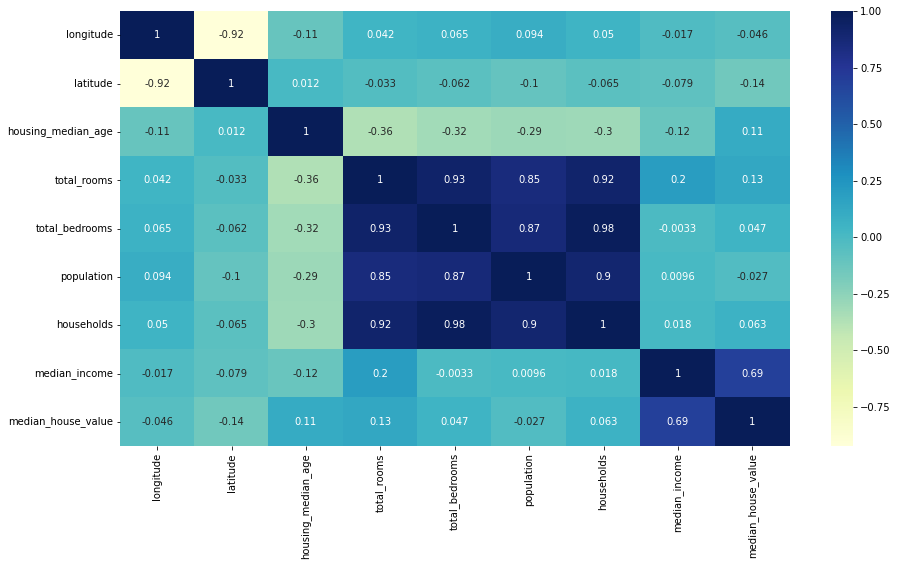

In [ ]:
#using heatmap to visualise correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu") # colour map will be yellow green blue

'''from the result we can see that median income is highly correlated with house value, 
but longitude latitude is negatively correlated with house value'''

Data Pre-processing

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) # +1 is to prevent zero values
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25d0079a00>,
      dtype=object)

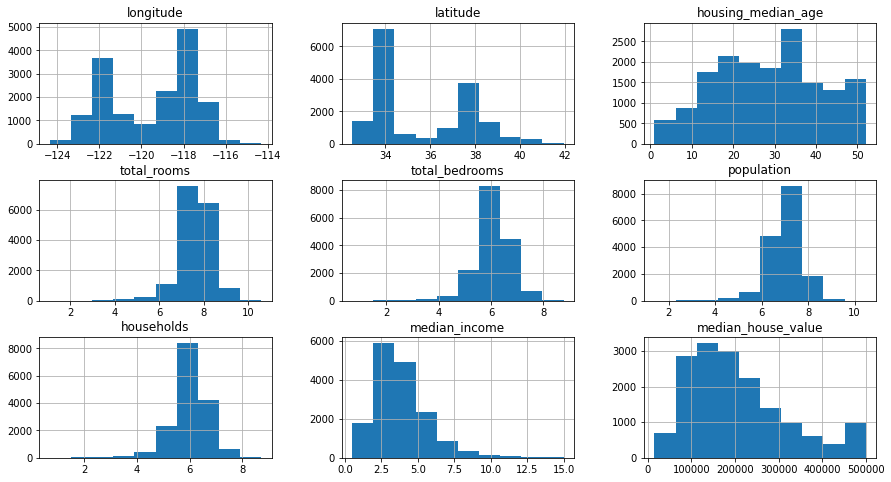

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7202
INLAND        5201
NEAR OCEAN    2092
NEAR BAY      1848
ISLAND           3
Name: ocean_proximity, dtype: int64

In [ ]:
pd.get_dummies(train_data.ocean_proximity) # cast a category in the brackets. we want to assign a boolean value of whether the property is near the ocean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20584,0,1,0,0,0
9820,1,0,0,0,0
20568,0,1,0,0,0
12944,0,1,0,0,0
10517,1,0,0,0,0
...,...,...,...,...,...
8640,1,0,0,0,0
13417,0,1,0,0,0
18628,1,0,0,0,0
11754,0,1,0,0,0


In [ ]:
#join the above boolean values with our train data
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20584,-121.95,38.65,19.0,7.143618,5.433722,6.628041,5.389072,3.3472,INLAND,69800.0,0,1,0,0,0
9820,-121.91,36.62,52.0,7.266827,5.707110,6.489205,5.683580,3.2865,<1H OCEAN,240100.0,1,0,0,0,0
20568,-121.78,38.66,18.0,8.348775,6.450470,7.553811,6.464588,4.8226,INLAND,139900.0,0,1,0,0,0
12944,-121.26,38.64,40.0,7.002156,5.170484,6.030685,5.081404,4.8375,INLAND,217400.0,0,1,0,0,0
10517,-117.71,33.51,11.0,7.695758,5.533389,6.784457,5.641907,13.1477,<1H OCEAN,487000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,-118.40,33.87,26.0,8.811801,7.273786,7.938802,7.240650,5.2276,<1H OCEAN,434500.0,1,0,0,0,0
13417,-117.47,34.06,33.0,7.229839,5.613128,6.785588,5.438079,2.7574,INLAND,125000.0,0,1,0,0,0
18628,-121.87,37.10,20.0,7.559559,5.720312,6.683361,5.713733,7.5755,<1H OCEAN,402300.0,1,0,0,0,0
11754,-121.17,38.76,14.0,7.615298,5.545177,6.661855,5.529429,6.5322,INLAND,394000.0,0,1,0,0,0


In [ ]:
#dropping the ocean proximity bcs now we've turned it into multiple features, then saving it in a variable called 'train_data'
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

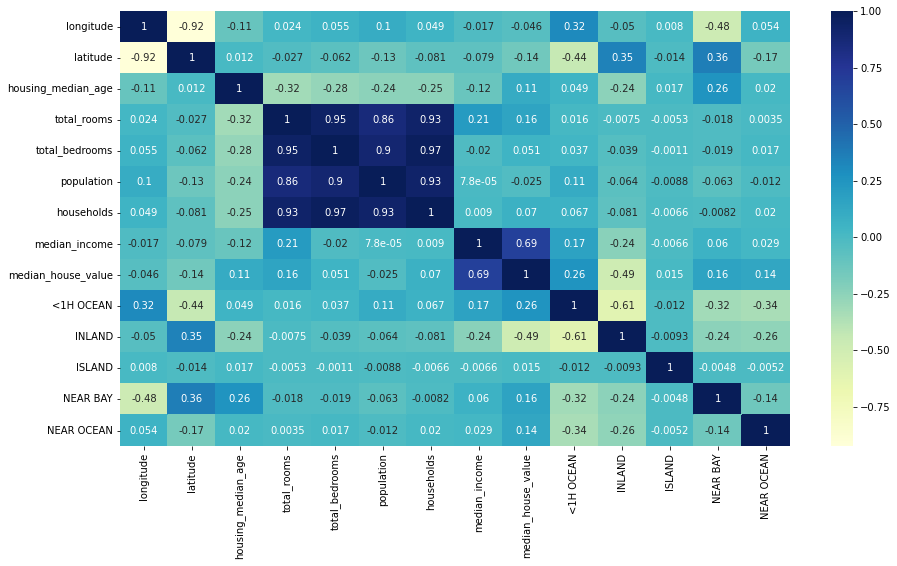

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu")

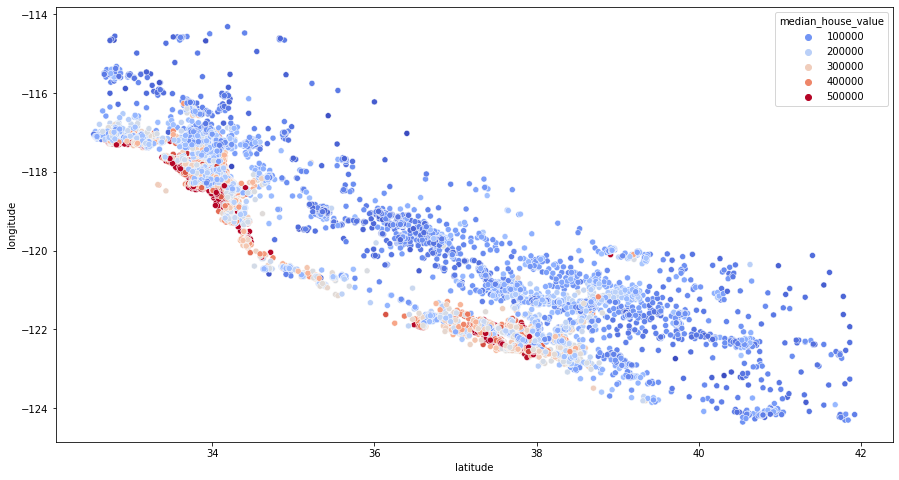

In [ ]:
# visualise the coordinates
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")


In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

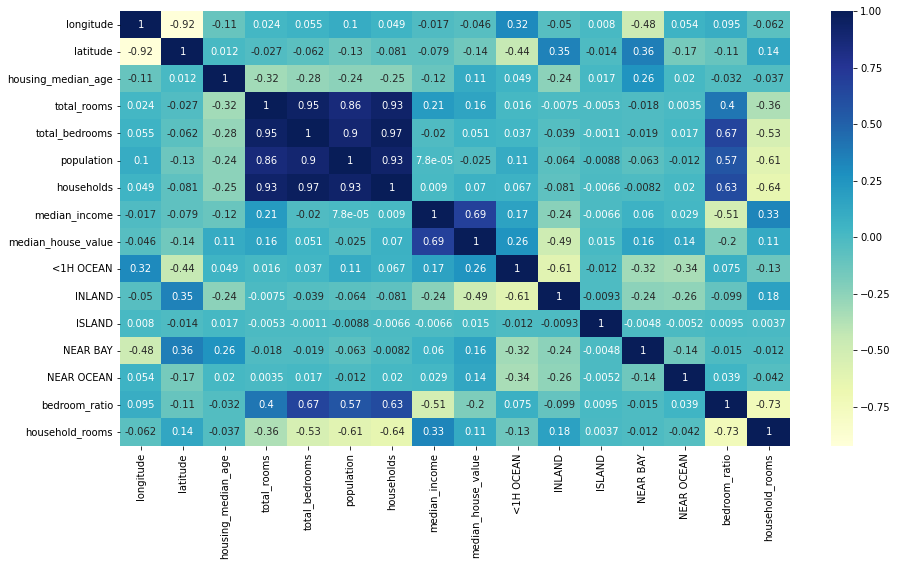

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu")

In [ ]:
#linear regression
# we have to add x and y data again, but we don't need to split into train and test data, in order to evaluate the model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) # +1 is to prevent zero values
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3946,-118.62,34.22,34.0,7.876259,6.156979,7.180831,6.061457,4.0909,1,0,0,0,0,0.781714,1.299400
16358,-121.29,38.00,12.0,8.303752,6.980076,8.143517,6.849066,1.9698,0,1,0,0,0,0.840593,1.212392
18380,-121.86,37.21,23.0,7.845024,5.723585,6.821107,5.758902,9.1974,1,0,0,0,0,0.729582,1.362243
17575,-121.93,37.32,50.0,7.035269,5.375278,6.216606,5.337538,4.2614,1,0,0,0,0,0.764047,1.318074
6076,-117.87,34.07,21.0,8.460411,6.783325,7.701200,6.645091,3.8167,1,0,0,0,0,0.801773,1.273182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12898,-121.34,38.64,17.0,7.923710,6.218600,7.029088,6.180017,3.7562,0,1,0,0,0,0.784809,1.282150
9764,-121.70,36.48,19.0,7.673688,6.173786,6.959399,6.061457,3.5039,1,0,0,0,0,0.804540,1.265981
3822,-118.48,34.19,36.0,7.629976,6.049733,7.032624,6.049733,3.8833,1,0,0,0,0,0.792890,1.261209
9840,-121.92,36.61,21.0,7.125283,5.831882,6.727432,5.894403,2.4922,0,0,0,0,1,0.818477,1.208822


In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3946,-118.62,34.22,34.0,7.876259,6.156979,7.180831,6.061457,4.0909,232900.0,1,0,0,0,0,0.781714,1.299400
16358,-121.29,38.00,12.0,8.303752,6.980076,8.143517,6.849066,1.9698,112300.0,0,1,0,0,0,0.840593,1.212392
18380,-121.86,37.21,23.0,7.845024,5.723585,6.821107,5.758902,9.1974,500001.0,1,0,0,0,0,0.729582,1.362243
17575,-121.93,37.32,50.0,7.035269,5.375278,6.216606,5.337538,4.2614,211300.0,1,0,0,0,0,0.764047,1.318074
6076,-117.87,34.07,21.0,8.460411,6.783325,7.701200,6.645091,3.8167,258700.0,1,0,0,0,0,0.801773,1.273182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12898,-121.34,38.64,17.0,7.923710,6.218600,7.029088,6.180017,3.7562,139700.0,0,1,0,0,0,0.784809,1.282150
9764,-121.70,36.48,19.0,7.673688,6.173786,6.959399,6.061457,3.5039,288400.0,1,0,0,0,0,0.804540,1.265981
3822,-118.48,34.19,36.0,7.629976,6.049733,7.032624,6.049733,3.8833,210400.0,1,0,0,0,0,0.792890,1.261209
9840,-121.92,36.61,21.0,7.125283,5.831882,6.727432,5.894403,2.4922,243800.0,0,0,0,0,1,0.818477,1.208822


In [ ]:
reg.score(X_test_s, y_test)

0.6840979364834048

In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor # by default it uses 100 random forests
forest = RandomForestRegressor()
forest.fit(X_train_s, y_train) # in the second instance he put the "_s" to check if he can get a better accuracy



RandomForestRegressor()

In [ ]:
forest.score(X_test_s, y_test)

0.8232240060821847

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
  "n_estimators": [3, 10, 30], 
  "max_features": [2, 4, 6, 8], #"min_samples_split": [2, 4, 6, 8] # originally this line was not present
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
  "n_estimators": [100, 200, 300], 
  
  "min_samples_split": [2, 4], # how many samples needed to split a node
  "max_depth": [None, 4, 8] # how deep shall the tree go
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_s, y_train)

KeyboardInterrupt: ignored

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
best_forest.score(X_test_s, y_test)

0.8227078340820606

In [ ]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8227078340820606